In [1]:
import pandas as pd
%matplotlib inline

In [2]:
!ls

amazon_baby.csv  Analyzing Product Sentiment.ipynb  assignment.ipynb


In [3]:
df = pd.read_csv("amazon_baby.csv")

In [4]:
df.head(10)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4


# Build the word count vector for each review

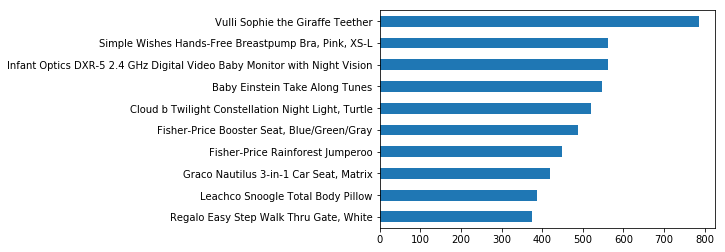

In [5]:
df.name.value_counts().nlargest(10).sort_values(ascending=True)\
.plot.barh()

# Explore Vulli Sophie

In [6]:
gdf = df[df.name == "Vulli Sophie the Giraffe Teether"]

gdf.shape

(785, 3)

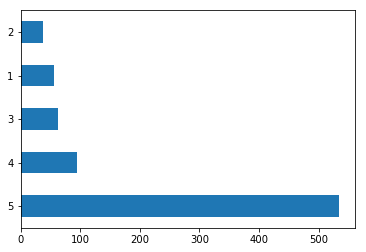

In [7]:
gdf.rating.value_counts().plot.barh()

# Build a sentiment classifier

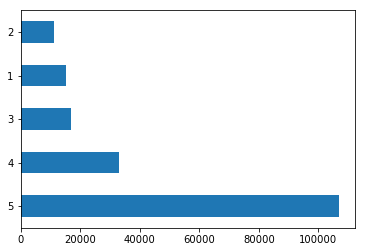

In [8]:
df.rating.value_counts().plot.barh()

## Define what's a positive and a negative sentiment

In [9]:
# ignore all 3* reviews
df = df[df.rating != 3]

In [10]:
# positive sentiment = 4* or 5*
df["sentiment"] = df.rating >= 4

In [11]:
df.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True


# Let's train the sentiment classifier

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

In [14]:
cv = CountVectorizer()

data = cv.fit_transform(df.review.fillna(""))

In [15]:
train_X, test_X, train_y, test_y = train_test_split(data, 
                                                    df.sentiment, 
                                                    random_state=0, 
                                                    train_size=.8)

In [16]:
lr = LogisticRegression().fit(train_X, train_y)

# Evaluate the sentiment model

In [17]:
import matplotlib.pyplot as plt
from scikitplot import classifier_factory

In [18]:
lr.score(train_X, train_y)

0.95968545962923812

In [19]:
classifier_factory(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

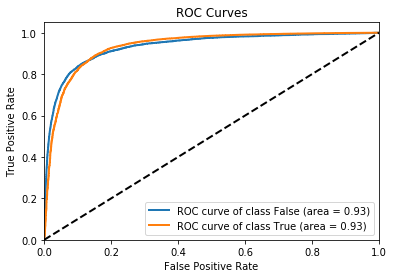

In [20]:
lr.plot_roc_curve(test_X, 
                  test_y, 
                  random_state=0, 
                  curves=('each_class'))

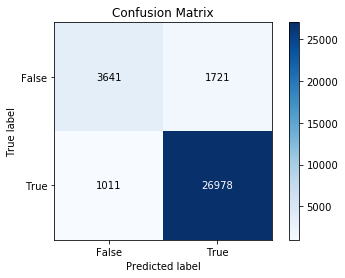

In [21]:
lr.plot_confusion_matrix(test_X, test_y)

# Apply the learned model to understand sentiment for Giraffe

In [22]:
data = cv.fit_transform(df.review.fillna(''))

In [85]:
df["lr_sentiment"] = lr.predict_proba(data)[:, 1]

In [86]:
df.head()

,name,review,rating,sentiment,predicted_sentiment,lr_sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True,0.747589,0.747589
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True,0.995010,0.995010
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True,0.999903,0.999903
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True,0.999047,0.999047
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True,0.999998,0.999998


In [87]:
gdf = df[df.name == "Vulli Sophie the Giraffe Teether"]

gdf.head()

,name,review,rating,sentiment,predicted_sentiment,lr_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,True,0.998621,0.998621
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,True,0.999212,0.999212
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,False,0.199689,0.199689
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,True,0.959426,0.959426
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,True,0.723558,0.723558


In [26]:
gdf = gdf.sort_values("predicted_sentiment", ascending=False)

gdf.head()

,name,review,rating,sentiment,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,True,1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,True,1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,True,1.0
34975,Vulli Sophie the Giraffe Teether,My 8 week old LOVES Sophie. The rubber feels s...,5,True,1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it\'s imported. Yes, it\'s expensive. And...",5,True,1.0


In [27]:
gdf.iloc[0, gdf.columns.get_loc("review")]

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie\\'s Day, thus the name was born. Since that time millions of Sophie\\'s populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet\\'s attention. Sophie has happy little squeaks that bring squeals of delight fro

In [28]:
gdf.iloc[1, gdf.columns.get_loc("review")]

'My Mom-in-Law bought Sophie for my son when he was just starting to really chew on things (and we were hearing some pretty scary things about toys not made in the USA). She did some research and came across Sophie and we are so glad that she did! While Sophie doesn\\\'t come from the USA, we love the fact that she is 100% safe and natural, and my son loves to play with her. I also love how soft Sophie is, my son tends to swing his toys around and when he\\\'s sitting on my lap I\\\'m usually in danger of being hit in the face with whatever he\\\'s holding, needless to say a soft toy is even better in my book! There\\\'s one last thing I want to comment on, I\\\'ve read reviews that said that Sophie was a "glorified dog toy" or something to that effect, and I don\\\'t want to seem rude, but I think they\\\'re crazy! Yes Sophie does squeak, (which my son didn\\\'t care about much at first but now he loves) but that\\\'s about as far as the comparison could go! If you want a quality teet

## Show most negative reviews

In [29]:
gdf.iloc[-1, gdf.columns.get_loc("review")]

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

In [30]:
gdf.iloc[-2, gdf.columns.get_loc("review")]

"Alright, first off didn\\'t realize this was a squeaky toy.  It is high quality but still same construction as a dog toy.  I really wouldn\\'t of gotten it had I known it squeaked, it drives my dog nuts.  I buy a present for my 4 month old that I now got to make sure the dog doesn\\'t get to.  It\\'s not a bad toy but really nothing special and the fact that it is basically a re-purposed dog toy is rather disappointing, no idea how it goes so many good reviews."

# Assignment

In [31]:
selected_words = ['awesome', 
                  'great', 
                  'fantastic', 
                  'amazing', 
                  'love', 
                  'horrible', 
                  'bad', 
                  'terrible', 
                  'awful', 
                  'wow', 
                  'hate']

In [32]:
sel_cv = CountVectorizer(vocabulary=selected_words)

sel_data = sel_cv.fit_transform(df.review.fillna(""))

In [71]:
sel_data.sum(axis=0)

matrix([[ 3892, 55791,  1664,  2628, 41994,  1110,  4183,  1146,   687,
           425,  1107]], dtype=int64)

In [73]:
# which words are most used

pd.Series(np.asarray(sel_data.sum(axis=0))[0, :], index=selected_words)\
.T.sort_values(ascending=False)

great        55791
love         41994
bad           4183
awesome       3892
amazing       2628
fantastic     1664
terrible      1146
horrible      1110
hate          1107
awful          687
wow            425
dtype: int64

In [54]:
sel_train_X, sel_test_X, train_y, test_y = train_test_split(sel_data, 
                                                    df.sentiment, 
                                                    random_state=0, 
                                                    train_size=.8)

In [55]:
sel_lr = LogisticRegression().fit(sel_train_X, train_y)

In [61]:
# which one got the most positive/negative weight? It makes sense to you?
# hell yeah!
pd.Series(sel_lr.coef_[0, :], index=selected_words)\
.T.sort_values(ascending=False)

love         1.380930
awesome      1.171903
amazing      1.054181
fantastic    0.900392
great        0.865964
wow         -0.097348
bad         -0.975250
hate        -1.433518
awful       -2.055797
terrible    -2.209991
horrible    -2.269081
dtype: float64

In [76]:
# what is the majority class classifier accuracy?

from sklearn.dummy import DummyClassifier

dm = DummyClassifier(strategy="most_frequent").fit(train_X, train_y)

dm.score(test_X, test_y)

0.83922521063836164

In [77]:
# how do you compare it with other models?

lr.score(test_X, test_y)

0.92965728164073036

In [78]:
sel_lr.score(sel_test_X, test_y)

0.8458217144913196

# Interpreting the difference in performance between the models

In [92]:
df["sel_sentiment"] = sel_lr.predict_proba(sel_data)[:, 1]

In [96]:
df.head()

,name,review,rating,sentiment,lr_sentiment,sel_sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True,0.747589,0.938162
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True,0.995010,0.792238
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True,0.999903,0.983703
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True,0.999047,0.973021
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True,0.999998,0.900647


In [98]:
btdc = df[df.name == "Baby Trend Diaper Champ"]

In [104]:
btdc.nlargest(1, "lr_sentiment")[['review', 'lr_sentiment', 'sel_sentiment']]

,review,lr_sentiment,sel_sentiment
376,"This is absolutely, by far, the best diaper pa...",1.0,0.983703


In [105]:
btdc.nlargest(1, "sel_sentiment")[['review', 'lr_sentiment', 'sel_sentiment']]

,review,lr_sentiment,sel_sentiment
329,I LOVE LOVE LOVE this product! It is SO much e...,0.999606,0.998251


In [125]:
top_lr_review = btdc.nlargest(1, "lr_sentiment")["review"]

print(top_lr_review.values)

[ "This is absolutely, by far, the best diaper pail money can buy.  Never do we detect a diaper odor (and my husband has a very sensitive sense of smell and is usually very quick to complain about such things).  For those who say they have a problem with the Diaper Champ getting stuck...the ONLY time this ever happens to us is when the bag is full and needs to be changed.  We love that it uses regular kitchen trash bags, makes it much more economical.  We have not found that we need to worry about frequent emptying or cleaning.  We just leave the Champ to do its job until the mechanism begins to feel like it\\'s getting stuck...then we change the bag.  For us this means about once a week.  Not only is the Champ EASY to use, it\\'s kind of fun.  Before our daughter was born we really worried about whether the diaper pail we chose would be effective enough for us because my husband is so sensitive to smells.  But she\\'s two months old now and we still just can\\'t say enough good things

In [126]:
pd.Series(np.asarray(sel_cv.transform(top_lr_review).todense())[0, :], index=selected_words)\
.T.sort_values(ascending=False)

love         2
hate         0
wow          0
awful        0
terrible     0
bad          0
horrible     0
amazing      0
fantastic    0
great        0
awesome      0
dtype: int64

In [135]:
vocab = [v[0] for v in sorted([(k, v) for k,v in cv.vocabulary_.items()], key=lambda x: x[1])]

pd.Series(np.asarray(cv.transform(top_lr_review).todense())[0, :], index=vocab)\
.T.sort_values(ascending=False)

the              15
we               14
is               10
to                9
and               8
champ             7
diaper            6
it                6
bag               5
about             5
this              3
for               3
just              3
enough            3
still             3
have              3
us                3
but               3
that              3
with              3
my                3
can               2
say               2
our               2
only              2
months            2
lysol             2
once              2
when              2
trash             2
                 ..
pollock           0
poles             0
polling           0
pollie            0
pollen            0
polled            0
poll              0
polkadots         0
polkadot          0
polka             0
polk              0
politics          0
politicically     0
politicians       0
political         0
politely          0
polite            0
polishing         0
polishes          0
